In [31]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [32]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # Pad the kernel to the image size
    pad_len_rows = (im.shape[0] - kernel.shape[0]) // 2
    pad_len_cols = (im.shape[1] - kernel.shape[1]) // 2
    
    kernel = np.pad(kernel, ((pad_len_rows, im.shape[0] - kernel.shape[0] - pad_len_rows), 
                             (pad_len_cols, im.shape[1]- kernel.shape[1] - pad_len_cols)), 
                    'constant', constant_values= ((0, 0), (0, 0)))
    fft_kernel = np.fft.fft2(kernel)
    
    # The rest is the same code as task 4a
    # Apply the Fourier transform to both the image
    fft_im = np.fft.fft2(im) 

    # Convolution theorem allows us to perform a convolution on the spatial domain as a simple
    # multiplication on the frequency domain
    fft_conv = fft_im * fft_kernel

    # Apply the inverse Fourier transform to get back to the spatial domain
    # We take the real part as we have roundabout errors
    # Note: In this task I have to apply an additional fftshift to get the final image, 
    # not sure why I need it here but not on task4a
    conv_result = np.fft.fftshift(np.fft.ifft2(fft_conv).real)
    
    # For the visualizations of the frequency-domain image signals. We do the following:
    #   1. Shift the zero-frequency to get proper alignment in the spatial domain
    #   2. Take the magnitude of the complex number (in numpy, same as absolute value of real numbers)
    #   3. Take the log transform log(a + 1) to get comprehensible values
    visualize_im_fft = np.log(np.absolute(np.fft.fftshift(fft_im)) + 1)
    visualze_kernel_fft = np.log(np.absolute(np.fft.fftshift(fft_kernel)) + 1)
    visualize_conv_fft = np.log(np.absolute(np.fft.fftshift(fft_conv)) + 1)
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2) 
        plt.imshow(visualize_im_fft)
        # Visualize FFT
        plt.subplot(1, 5, 3)
        plt.imshow(visualze_kernel_fft)
        # Visualize FFT kernel
        plt.subplot(1, 5, 4)
        plt.imshow(visualize_conv_fft)
        # Visualize filtered FFT image
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
    ### END YOUR CODE HERE ###
    return conv_result

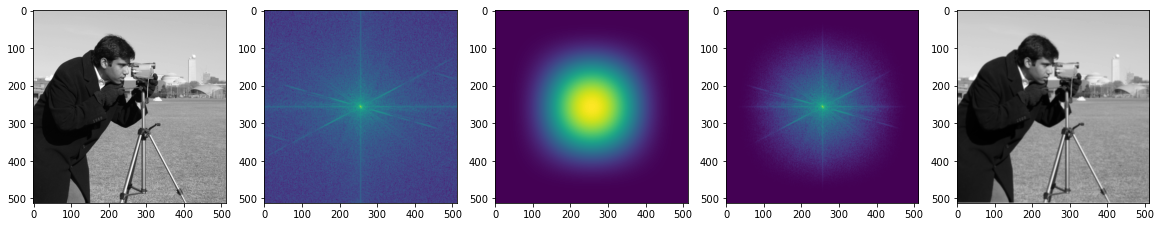

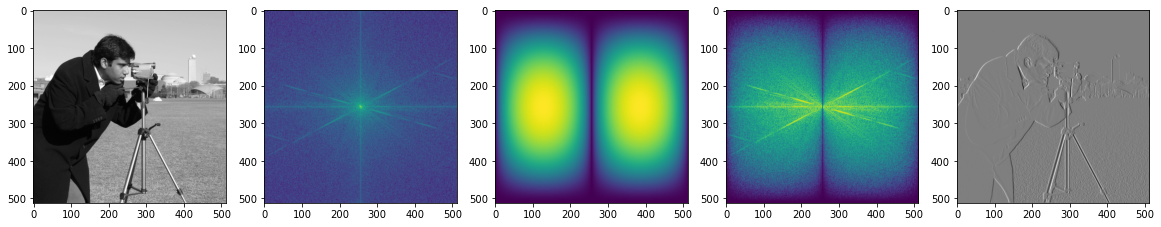

Saving image to: image_processed\camera_gaussian.png
Saving image to: image_processed\camera_sobelx.png


In [33]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)